# 1. Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## 2. Exploring the Data

In [2]:
weather = pd.read_csv("Jeff_Weather.csv",index_col="date")
weather =weather.drop(weather.columns[0],axis=1)

In [3]:
weather

,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,avg_wind_speed_kmh,avg_sea_level_pres_hpa
date,,,,,,,
1973-01-02,Winter,-2.5,-7.2,3.3,0.0,12.6,1028.7
1973-01-04,Winter,-7.9,-11.1,-2.8,0.0,22.2,1025.5
1973-01-05,Winter,-10.9,-11.1,-10.0,0.0,14.6,1028.8
1973-01-07,Winter,-7.4,-9.4,-5.0,4.1,18.6,1031.9
1973-01-09,Winter,-14.8,-19.4,-10.0,0.0,16.2,1036.6
...,...,...,...,...,...,...,...
2023-08-24,Summer,30.4,25.6,36.0,0.0,11.8,1014.4
2023-08-25,Summer,30.8,25.6,36.7,0.0,9.0,1013.4
2023-08-26,Summer,24.5,22.2,27.0,10.8,12.2,1014.5


In [4]:
weather.index = pd.to_datetime(weather.index)

<AxesSubplot:>

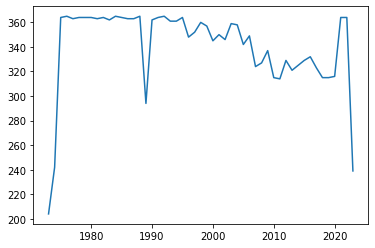

In [5]:
Yr=weather.index.year.value_counts().sort_index()
Yr.plot()

In [6]:
weather.describe()

,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,avg_wind_speed_kmh,avg_sea_level_pres_hpa
count,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000
mean,12.667066,7.112248,18.461056,2.587635,15.184971,1017.052441
std,10.625961,10.353041,11.400028,8.074522,5.387027,6.660594
min,-25.000000,-28.900000,-21.700000,0.000000,0.400000,987.900000
25%,4.400000,-0.600000,10.000000,0.000000,11.200000,1012.800000
50%,13.900000,7.800000,20.000000,0.000000,14.400000,1016.700000
75%,21.900000,16.100000,27.800000,0.500000,18.400000,1020.900000
max,34.300000,28.900000,43.900000,150.900000,43.600000,1048.500000


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

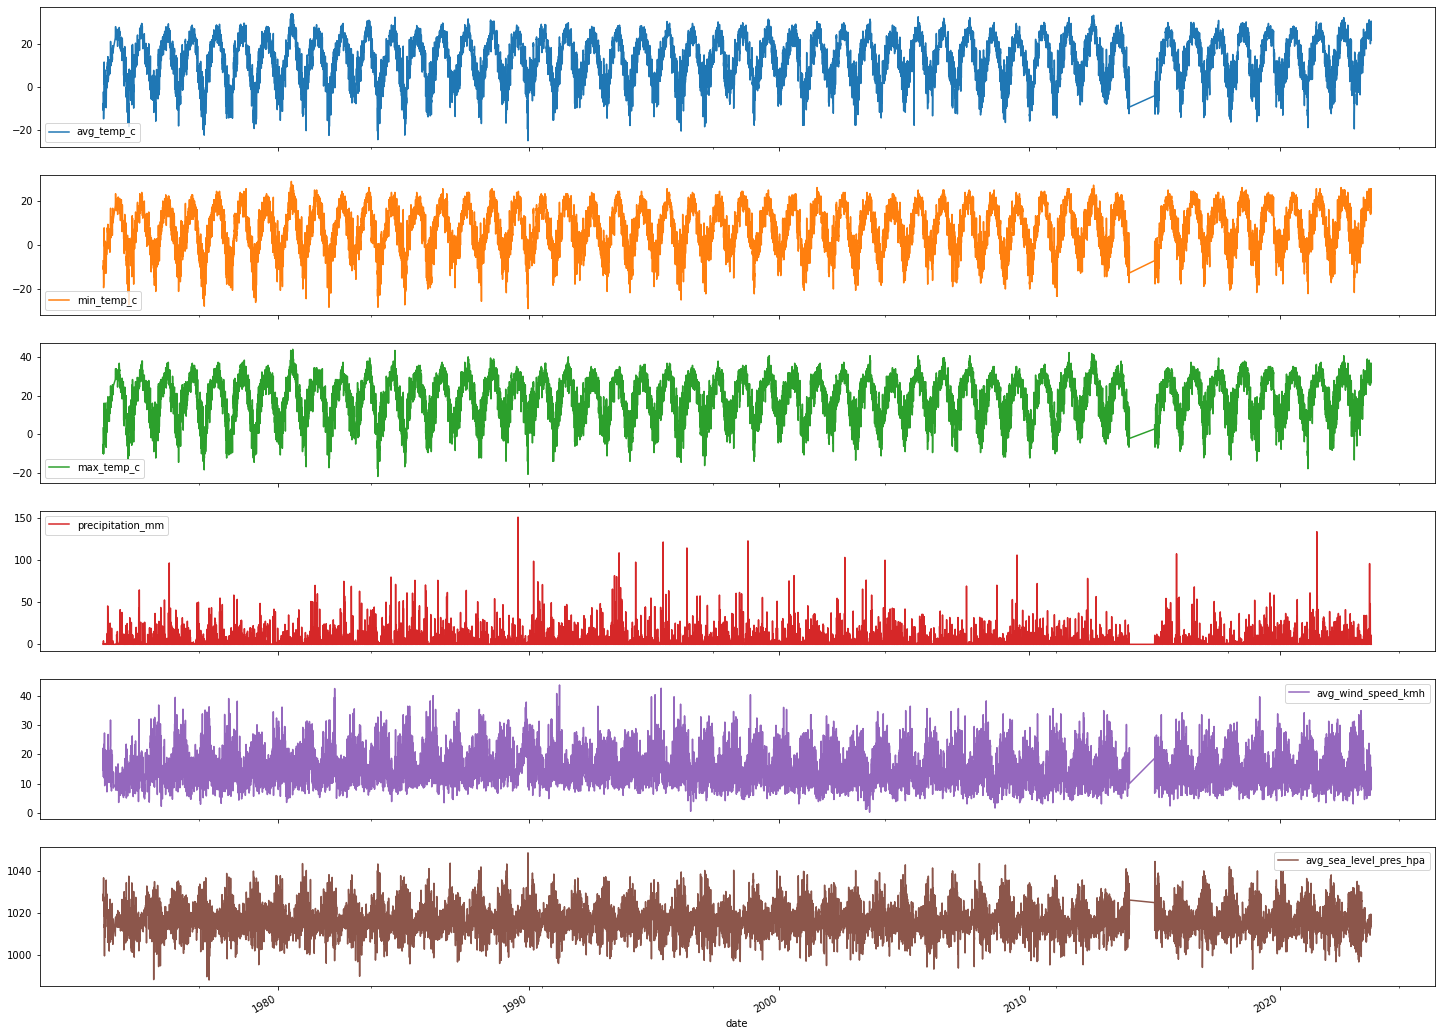

In [7]:
weather.plot(subplots=True, figsize=(25,20))

array([[<AxesSubplot:title={'center':'avg_temp_c'}>,
        <AxesSubplot:title={'center':'min_temp_c'}>],
       [<AxesSubplot:title={'center':'max_temp_c'}>,
        <AxesSubplot:title={'center':'precipitation_mm'}>],
       [<AxesSubplot:title={'center':'avg_wind_speed_kmh'}>,
        <AxesSubplot:title={'center':'avg_sea_level_pres_hpa'}>]],
      dtype=object)

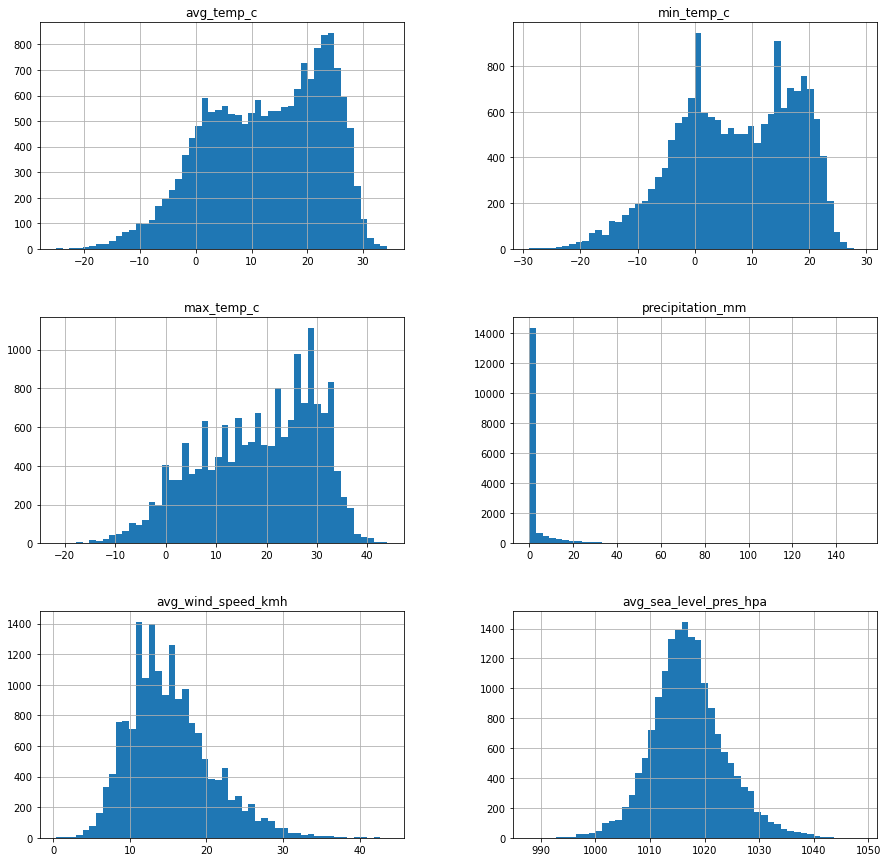

In [8]:
weather.hist(bins=50,figsize=(15,15))

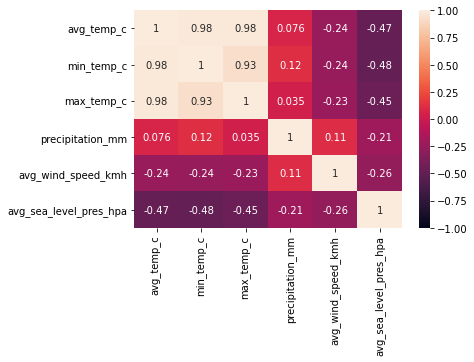

In [9]:
heatmap = sns.heatmap(weather.corr(), vmin=-1, vmax=1, annot=True)

# 3. Random Forest Model

## 3.1 Splitting the data

In [10]:
weather_y = weather.pop("avg_temp_c")
weather_x = weather[["min_temp_c", "max_temp_c", "precipitation_mm",\
                               "avg_wind_speed_kmh","avg_sea_level_pres_hpa"]].copy()

In [11]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.25)

In [12]:
print("train_X shape:", train_X.shape)
print("test_X shape:", test_X.shape)
print("train_y shape:", train_y.shape)
print("test_y shape:", test_y.shape)

train_X shape: (12780, 5)
test_X shape: (4260, 5)
train_y shape: (12780,)
test_y shape: (4260,)


## 3.2 Model and Analysis

In [13]:
regr=RandomForestRegressor()
regr.fit(train_X,train_y)

RandomForestRegressor()

In [14]:
prediction=regr.predict(test_X)
np.mean(np.absolute(prediction-test_y))

0.6426550665101726

In [15]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.99


In [16]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
date,,,
2015-10-24,17.1,14.24,2.86
2008-01-21,-2.6,-3.96,1.36
2005-12-15,0.1,0.85,-0.75
1977-07-23,25.2,25.23,-0.03
2021-02-26,3.8,3.88,-0.08
...,...,...,...
2007-01-08,2.9,1.59,1.31
1983-11-28,-0.4,-0.10,-0.30
2016-02-03,3.1,1.48,1.62


In [17]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 0.64
Residual sum of squares (MSE): 0.83
R2-score: 0.99
